## Demo of Cluster pictures in SageMath

Reload the module whenever it changes for easy development:

In [49]:
%reload_ext autoreload
%autoreload 2
from sage_cluster_pictures import *
#from sage_cluster_pictures.cluster_pictures import Cluster
set_verbose(0)
latex.extra_preamble('')
latex.add_to_preamble(r"\usepackage{tkz-graph,semtkzX}")
latex.add_to_mathjax_avoid_list("clusterpicture")
sage.misc.latex.EMBEDDED_MODE = True

Example 1.2 of DMDM

In [50]:
p = 7
x = polygen(Qp(p))
H = HyperellipticCurve((x-1)*(x-(1+p^2))*(x-(1-p^2))*(x-p)*x*(x-p^3)*(x+p^3))
C = Cluster.from_curve(H)
C

Cluster with 7 roots and 2 children

We can display the cluster as ASCII art and unicode art

In [3]:
%display ascii_art
C

((* * *) *) (* * *)

In [4]:
%display unicode_art

In [5]:
C

((● ● ●) ●) (● ● ●)

Finally we should be able to display the nice Tikz graphs, this required a teeny bit of hacking sage.
https://trac.sagemath.org/ticket/19515

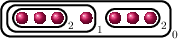

In [6]:
view(C)

Let's test some basic functionality.

In [7]:
C.is_even()

False

In [8]:
C.is_odd()

True

In [9]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(6), K(5), K(10)])
C.is_ubereven()

verbose 1 (41: cluster_pictures.py, __init__) [20  1  0  0]
[ 1 20  0  0]
[ 0  0 20  1]
[ 0  0  1 20]
verbose 1 (41: cluster_pictures.py, __init__) 0
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0, 1], 2: [2, 3]})
verbose 1 (41: cluster_pictures.py, __init__) [20  1]
[ 1 20]
verbose 1 (41: cluster_pictures.py, __init__) 1
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20  1]
[ 1 20]
verbose 1 (41: cluster_pictures.py, __init__) 1
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1

True

In [10]:
C

(● ●) (● ●)

In [11]:
%display plain
list(C.all_descendents())

[Cluster with 2 roots and 2 children,
 Cluster with 1 roots and 0 children,
 Cluster with 1 roots and 0 children,
 Cluster with 2 roots and 2 children,
 Cluster with 1 roots and 0 children,
 Cluster with 1 roots and 0 children]

In [12]:
C.children()[0].children()[0].is_proper()

False

In [13]:
C.children()[0].parent_cluster()

Cluster with 4 roots and 2 children

Finally we can make this last example again from just root valuation data, a matrix of valuations of differences. This way we don't pick a prime $p$.

In [14]:
C = Cluster(Matrix(ZZ, 4, 4,[
                   [20, 1, 0, 0 ],
                   [1, 20, 0, 0 ],
                   [0, 0, 20, 1 ],
                   [0, 0, 1, 20 ],
                ]))
C.is_ubereven()

verbose 1 (41: cluster_pictures.py, __init__) [20  1  0  0]
[ 1 20  0  0]
[ 0  0 20  1]
[ 0  0  1 20]
verbose 1 (41: cluster_pictures.py, __init__) 0
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0, 1], 2: [2, 3]})
verbose 1 (41: cluster_pictures.py, __init__) [20  1]
[ 1 20]
verbose 1 (41: cluster_pictures.py, __init__) 1
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20  1]
[ 1 20]
verbose 1 (41: cluster_pictures.py, __init__) 1
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1

True

In [15]:
print(unicode_art(C))

(● ●) (● ●)


Let's see if it can handle Raymond's example from the draft:

In [16]:
K = Qp(3)
x = polygen(K)
H = HyperellipticCurve(x*(x - 3)*(x - 4)*(x - 13)*(x + 1)*(x + 5))
C = Cluster.from_curve(H)
C

verbose 1 (41: cluster_pictures.py, __init__) [20  0  0  0  0  0]
[ 0 20  2  2  0  0]
[ 0  2 20  2  0  0]
[ 0  2  2 20  0  0]
[ 0  0  0  0 20  1]
[ 0  0  0  0  1 20]
verbose 1 (41: cluster_pictures.py, __init__) 0
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1, 2, 3], 4: [4, 5]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20  2  2]
[ 2 20  2]
[ 2  2 20]
verbose 1 (41: cluster_pictures.py, __init__) 2
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1], 2: [2]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init_

Cluster with 6 roots and 3 children

In [17]:
%display unicode_art
C

● (● ● ●) (● ●)

so far so good!

In [18]:
C = Cluster.from_roots([K(1), K(5), K(10)])
C.children()[0].is_twin()

verbose 1 (41: cluster_pictures.py, __init__) [20  0  2]
[ 0 20  0]
[ 2  0 20]
verbose 1 (41: cluster_pictures.py, __init__) 0
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0, 2], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [20  2]
[ 2 20]
verbose 1 (41: cluster_pictures.py, __init__) 2
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})


True

In [19]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(5), K(10)])
C.is_top_cluster()

verbose 1 (41: cluster_pictures.py, __init__) [20  0  0]
[ 0 20  1]
[ 0  1 20]
verbose 1 (41: cluster_pictures.py, __init__) 0
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1, 2]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20  1]
[ 1 20]
verbose 1 (41: cluster_pictures.py, __init__) 1
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})


True

In [20]:
C.children()[0].is_top_cluster()

False

In [21]:
C.relative_depth()

0

In [22]:
C.children()[1].relative_depth()

1

In [23]:
C2 = Cluster.from_roots([K(5), K(25), K(50)])
C2.depth()

verbose 1 (41: cluster_pictures.py, __init__) [20  1  1]
[ 1 20  2]
[ 1  2 20]
verbose 1 (41: cluster_pictures.py, __init__) 1
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1, 2]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20  2]
[ 2 20]
verbose 1 (41: cluster_pictures.py, __init__) 2
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})


1

In [24]:
C2.relative_depth()

1

In [25]:
C2.children()[1].relative_depth()

1

In [26]:
C2.genus()

1

In [27]:
C = Cluster.from_roots([K(1), K(6), K(26), K(126)])
C.children()[0].children()[0].children()[0].top_cluster()

verbose 1 (41: cluster_pictures.py, __init__) [20  1  2  3]
[ 1 20  1  1]
[ 2  1 20  2]
[ 3  1  2 20]
verbose 1 (41: cluster_pictures.py, __init__) 1
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0, 2, 3], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [20  2  3]
[ 2 20  2]
[ 3  2 20]
verbose 1 (41: cluster_pictures.py, __init__) 2
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0, 2], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [20  3]
[ 3 20]
verbose 1 (41: cluster_pictures.py, __init__) 3
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defa

((● ●) ●) ●

In [28]:
C.children()[0].children()[0].depth()

3

In [29]:
C.children()[0].children()[0].relative_depth()

1

Example 3.5 in the users guide

In [121]:
K = Qp(7,150)
x = polygen(K)
L = K.extension(x^2 + 1, names='a')
x = polygen(L)
L2 = L.extension(x^2 - 7, names='b')
x = polygen(L2)
H = HyperellipticCurve((x^2+7^2)*(x^2-7^(15))*(x-7^6)*(x-7^6-7^9))
R = Cluster.from_curve(H)
R

verbose 1 (41: cluster_pictures.py, __init__) [300  15  12  12   2   2]
[ 15 300  12  12   2   2]
[ 12  12 300  18   2   2]
[ 12  12  18 300   2   2]
[  2   2   2   2 300   2]
[  2   2   2   2   2 300]
verbose 1 (41: cluster_pictures.py, __init__) 2
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0, 1, 2, 3], 4: [4], 5: [5]})
verbose 1 (41: cluster_pictures.py, __init__) [300  15  12  12]
[ 15 300  12  12]
[ 12  12 300  18]
[ 12  12  18 300]
verbose 1 (41: cluster_pictures.py, __init__) 12
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0, 1], 2: [2, 3]})
verbose 1 (41: cluster_pictures.py, __init__) [300  15]
[ 15 300]
verbose 1 (41: cluster_pictures.py, __init__) 15
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [300]
verbose 1 (41: cluster_pictures.py, __init__) 300
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'l

Cluster with 6 roots and 3 children

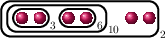

In [122]:
view(R)

In [123]:
R.depth()

2

In [124]:
%display plain
a = R.children()[0]
a.depth()

12

In [34]:
a.relative_depth()

10

In [35]:
t1 = a.children()[0]
t1.depth()

15

In [36]:
t2 = a.children()[1]
t2.depth()

18

In [37]:
a.is_ubereven()

True

In [38]:
t1.is_twin()

True

In [39]:
t2.is_twin()

True

In [40]:
R.is_cotwin()

True

In [41]:
a.is_cotwin()

False

In [42]:
t1.is_cotwin()

False

In [43]:
[c for c in R.all_descendents() if c.is_principal()]

[Cluster with 4 roots and 2 children]

In [44]:
a.is_principal()

True

In [45]:
t1.meet(t2)

verbose 1 (408: cluster_pictures.py, meet) Cluster with 2 roots and 2 children
verbose 1 (408: cluster_pictures.py, meet) Cluster with 2 roots and 2 children
verbose 1 (408: cluster_pictures.py, meet) Cluster with 2 roots and 2 children
verbose 1 (408: cluster_pictures.py, meet) Cluster with 4 roots and 2 children


Cluster with 4 roots and 2 children

In [46]:
t1.meet(t2) == a

verbose 1 (408: cluster_pictures.py, meet) Cluster with 2 roots and 2 children
verbose 1 (408: cluster_pictures.py, meet) Cluster with 2 roots and 2 children
verbose 1 (408: cluster_pictures.py, meet) Cluster with 2 roots and 2 children
verbose 1 (408: cluster_pictures.py, meet) Cluster with 4 roots and 2 children


True

In [47]:
t2.meet(t1)

verbose 1 (408: cluster_pictures.py, meet) Cluster with 2 roots and 2 children
verbose 1 (408: cluster_pictures.py, meet) Cluster with 2 roots and 2 children
verbose 1 (408: cluster_pictures.py, meet) Cluster with 2 roots and 2 children
verbose 1 (408: cluster_pictures.py, meet) Cluster with 4 roots and 2 children


Cluster with 4 roots and 2 children

In [48]:
t2.star()

Cluster with 2 roots and 2 children

In [130]:
a.is_ubereven()

True

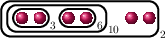

In [129]:
view(R)

A top cotwin

In [110]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(5), K(10)])
view(C)

verbose 1 (41: cluster_pictures.py, __init__) [20  0  0]
[ 0 20  1]
[ 0  1 20]
verbose 1 (41: cluster_pictures.py, __init__) 0
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1, 2]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20  1]
[ 1 20]
verbose 1 (41: cluster_pictures.py, __init__) 1
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})


In [111]:
C.is_cotwin()

True

In [112]:
C.children()[1]

Cluster with 2 roots and 2 children

In [113]:
C.children()[1].is_cotwin()

False

In [114]:
C.star()

verbose 1 (456: cluster_pictures.py, star) Cluster with 3 roots and 2 children
verbose 1 (456: cluster_pictures.py, star) [Cluster with 2 roots and 2 children]


Cluster with 2 roots and 2 children

A non-top cotwin

verbose 1 (41: cluster_pictures.py, __init__) [20  0  0  0]
[ 0 20  1  1]
[ 0  1 20  2]
[ 0  1  2 20]
verbose 1 (41: cluster_pictures.py, __init__) 0
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1, 2, 3]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20  1  1]
[ 1 20  2]
[ 1  2 20]
verbose 1 (41: cluster_pictures.py, __init__) 1
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1, 2]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20  2]
[ 2 20]
verbose 1 (41: cluster_pictures.py, __init__) 2
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class

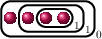

In [116]:
C = Cluster.from_roots([K(1), K(5), K(10), K(35)])
view(C)

In [117]:
C.is_cotwin()

False

In [118]:
C.children()[0].is_cotwin()

False

In [119]:
C.children()[1].is_cotwin()

True

In [120]:
C.children()[1].star()

verbose 1 (456: cluster_pictures.py, star) Cluster with 3 roots and 2 children
verbose 1 (456: cluster_pictures.py, star) [Cluster with 2 roots and 2 children]


Cluster with 2 roots and 2 children

In [105]:
C = Cluster.from_roots([K(1), K(2), K(10), K(35)])
view(C)

verbose 1 (41: cluster_pictures.py, __init__) [20  0  0  0]
[ 0 20  0  0]
[ 0  0 20  2]
[ 0  0  2 20]
verbose 1 (41: cluster_pictures.py, __init__) 0
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1], 2: [2, 3]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (41: cluster_pictures.py, __init__) [20  2]
[ 2 20]
verbose 1 (41: cluster_pictures.py, __init__) 2
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1]})
verbose 1 (41: cluster_pictures.py, __init__) [20]
verbose 1 (41: cluster_pictures.py, __init__) 20
verbose 1 (41: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {})
verbose 1 (

In [106]:
C.is_cotwin()

True

In [107]:
C.children()[0].is_cotwin()

False

In [108]:
C.children()[1].is_cotwin()

False

In [109]:
C.star()

verbose 1 (456: cluster_pictures.py, star) Cluster with 4 roots and 3 children
verbose 1 (456: cluster_pictures.py, star) [Cluster with 2 roots and 2 children]


Cluster with 2 roots and 2 children